In [1]:
# Author - Puneet Soni
# Object X detection using feature matching

#Feature Matching using Brute Force Matcher

import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import time

In [2]:
start_time = time.perf_counter()
# speed-up using multithreads

cv2.setUseOptimized(True);
cv2.setNumThreads(8);

# Read the query image and input image files

img1 =  cv2.imread('image_data_set/sample_test_image_query_8.jpg',0)
img2 =  cv2.imread('image_data_set/sample_test_image_8.jpg',0)


In [3]:
# Initiate SIFT detector
sift =  cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SURF
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [4]:
# BFMatcher with default params
bf = cv2.BFMatcher()

matches = bf.knnMatch(des1,des2,k=2)

In [15]:
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.98*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img_output_1 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good[:200],None,flags=2)
Total_Execution_Time = time.perf_counter() - start_time

In [16]:
# Define how similar they are
number_keypoints = 0
if len(kp1) <= len(kp2):
    number_keypoints = len(kp1)
else:
    number_keypoints = len(kp2)
print("Keypoints 1ST Image: " + str(len(kp1)))
print("Keypoints 2ND Image: " + str(len(kp2)))

Keypoints 1ST Image: 1815
Keypoints 2ND Image: 4637


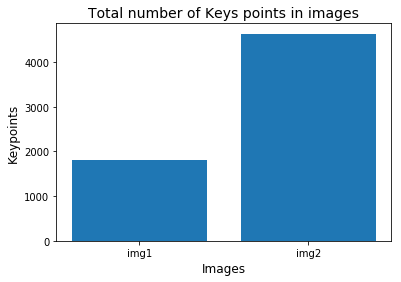

In [17]:
image_array = ['img1','img2']
keypoints_array = [len(kp1),len(kp2)]

plt.bar(image_array, keypoints_array)
plt.title('Total number of Keys points in images', fontsize=14)
plt.xlabel('Images', fontsize='large')
plt.xticks()
plt.ylabel('Keypoints', fontsize='large')

plt.show()

In [18]:
print("GOOD Matches:", len(good))
#print("Features Matching Percentage: ", len(good) / number_keypoints * 100, "%")
print("Features Matching Percentage: ", len(good) / len(kp1) * 100, "%")

GOOD Matches: 1721
Features Matching Percentage:  94.82093663911846 %


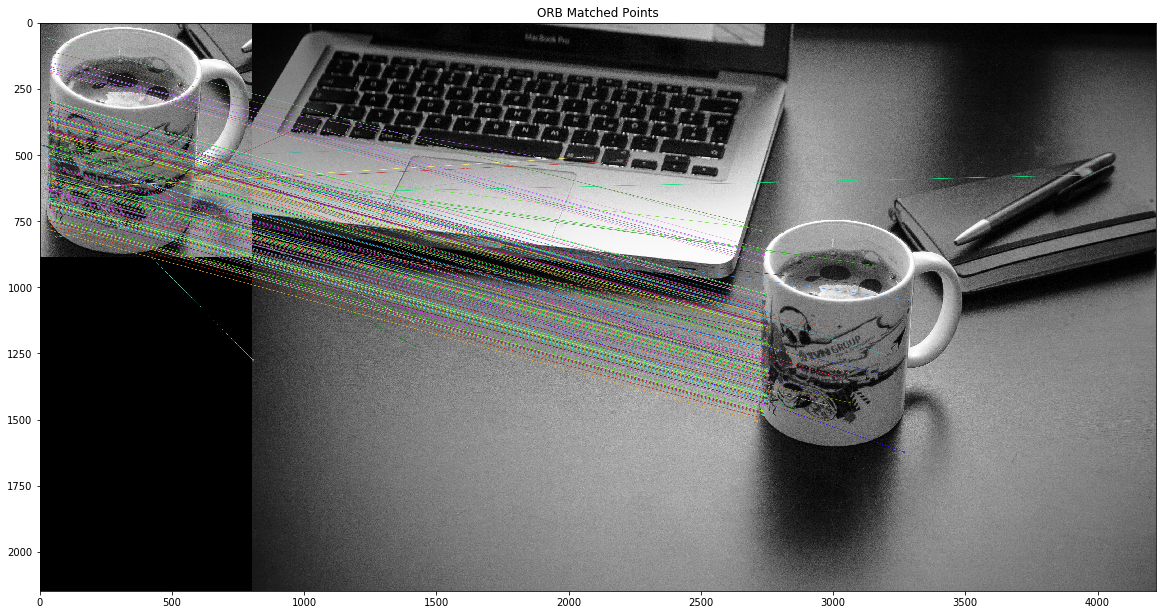

True

In [19]:
plt.figure(figsize=(20, 20))
plt.title('ORB Matched Points')
plt.imshow(img_output_1)
plt.show()
cv2.imwrite('matching_results/IMAGE_SIFT_OUTPUT_6.png',img_output_1)

In [10]:
#Total_Execution_Time = time.perf_counter() - start_time
print(Total_Execution_Time, "seconds")

29.281900699999994 seconds


Text(0, 0.5, 'Accuracy')

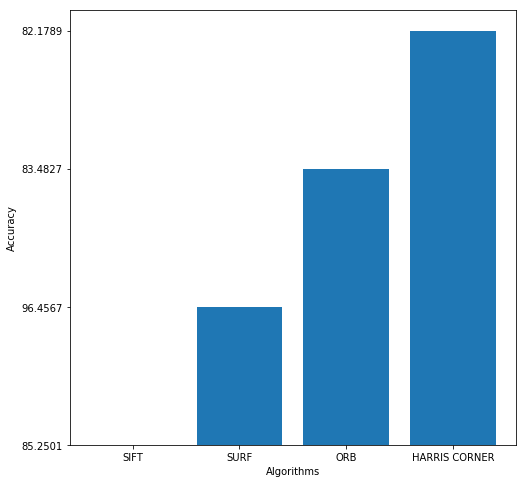

In [11]:
algorithms = ['SIFT', 'SURF', 'ORB', 'HARRIS CORNER']
accuracy = ['85.2501', '96.4567', '83.4827', '82.1789']

plt.figure(figsize=(8,8))
plt.bar(algorithms,accuracy)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Good Matches')

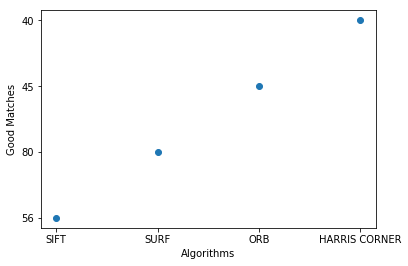

In [12]:
good_matches = ['56', '80', '45', '40']
plt.scatter(algorithms,good_matches)
plt.xlabel('Algorithms')
plt.ylabel('Good Matches')

Text(0, 0.5, 'Total Execution Time')

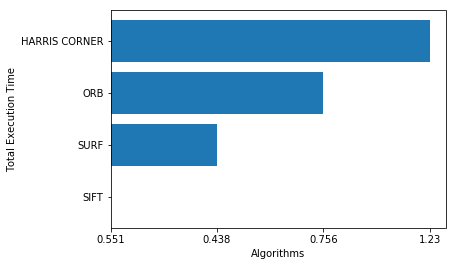

In [13]:
total_execution_time = ['0.551', '0.438', '0.756', '1.23']
plt.barh(algorithms,total_execution_time)
plt.xlabel('Algorithms')
plt.ylabel('Total Execution Time')